# OrthoSAM examples

In [5]:
import json
import os
import sys
from utility import load_config,create_dir_ifnotexist, prompt_fid,load_image, plot_tiling_with_overlap

**This example will process an entire directory containing several files. The data were taken from SediNet https://github.com/DigitalGrainSize/SediNet, because they provide reasonable sized images that take about 2 minutes per image.**

If you would like to process only a few images, we suggest downloading:
https://github.com/DigitalGrainSize/SediNet/blob/master/images/5_6.JPG
https://github.com/DigitalGrainSize/SediNet/blob/master/images/4.JPG
https://github.com/DigitalGrainSize/SediNet/blob/master/images/8.JPG

and place them into `data/SediNet/images`.

In the first step, we set parameters and create the list of files. If you set `id=None`, all files in the directory listed in 'DatasetName' will be processed. If you only want to process a single image, you either give the filename or the number of the file in the field 'fid'. For this example, we only work with the first image (id=0).

In [9]:
id=0 # Filename or the index after sorting by file name. If not known input None and all files will be listed with the index.
# For this example, we only work with the first image (id=0).

#main_para defines the parameters for the first layer
#it also serves as a template for the later layers.
main_para={'OutDIR': f'Sedinet/sedinet_{id}_up2_org',# where output will be stored relative to the MainOutDIR stored in config.json
    'DatasetName': 'SediNet/images',#where image is stored
    'fid': id, #Filename or the index after sorting by file name. If index is not known use None and all files will be listed with the index.
    'resolution(mm)': 1, #image resolution in mm/pixel
    'tile_size': 1024,
    'tile_overlap':200,
    'resample_factor': 1, #'Auto': auto select resample rate.
    'input_point_per_axis': 30,
    'dilation_size':5,
    'stability_t':0.85,
    'expected_min_size(sqmm)': 500,
    'min_radius': 0,
    'Calculate_stats': True, # True: calculate statistics. 
    'Discord_notification': False,# True: send discord when finished. If you wish to use this feature, please create a file name DWH.txt in the code directory and set the webhook.
    'Plotting': True# True: plot the results
    }

#para_list defines the parameters for the later layers
#each dictionary corresponds to one layer.
# The first layer is defined in main_para.
#the second layer is defined in para_list[0] and so on.
#main_para serves as a template for the later layers.
#and in para_list specify the parameters for each layer that need to be updated.
para_list=[
    {'resample_factor':1/2, #None: use method A. 'Auto': auto select resample rate.
    }
    ]

#parameters for preprocessing. Only create this list if you want to use preprocessing.
#preprocessing is optional.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Resample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

You can verify the parameters by looking at the dictonaries

In [10]:
main_para

{'OutDIR': 'Sedinet/sedinet_0_up2_org',
 'DatasetName': 'SediNet/images',
 'fid': 0,
 'resolution(mm)': 1,
 'tile_size': 1024,
 'tile_overlap': 200,
 'resample_factor': 1,
 'input_point_per_axis': 30,
 'dilation_size': 5,
 'stability_t': 0.85,
 'expected_min_size(sqmm)': 500,
 'min_radius': 0,
 'Calculate_stats': True,
 'Discord_notification': False,
 'Plotting': True}

In [11]:
main_para['1st_resample_factor'] = main_para['resample_factor']
config = load_config()
main_para={**config,**main_para}
main_para['OutDIR'] = os.path.join(main_para.get('MainOutDIR'), main_para.get('OutDIR'))
if not os.path.exists(os.path.join(main_para.get('DataDIR'), main_para.get('DatasetName'))):
    print('Input directory does not exist. Exiting script.')
    sys.exit()

OutDIR=main_para.get('OutDIR')
create_dir_ifnotexist(OutDIR)
# if main_para.get('fid')==None:
#     main_para=prompt_fid(main_para)

/home/bodo/OrthoSAM/data/SediNet/images/4.JPG imported


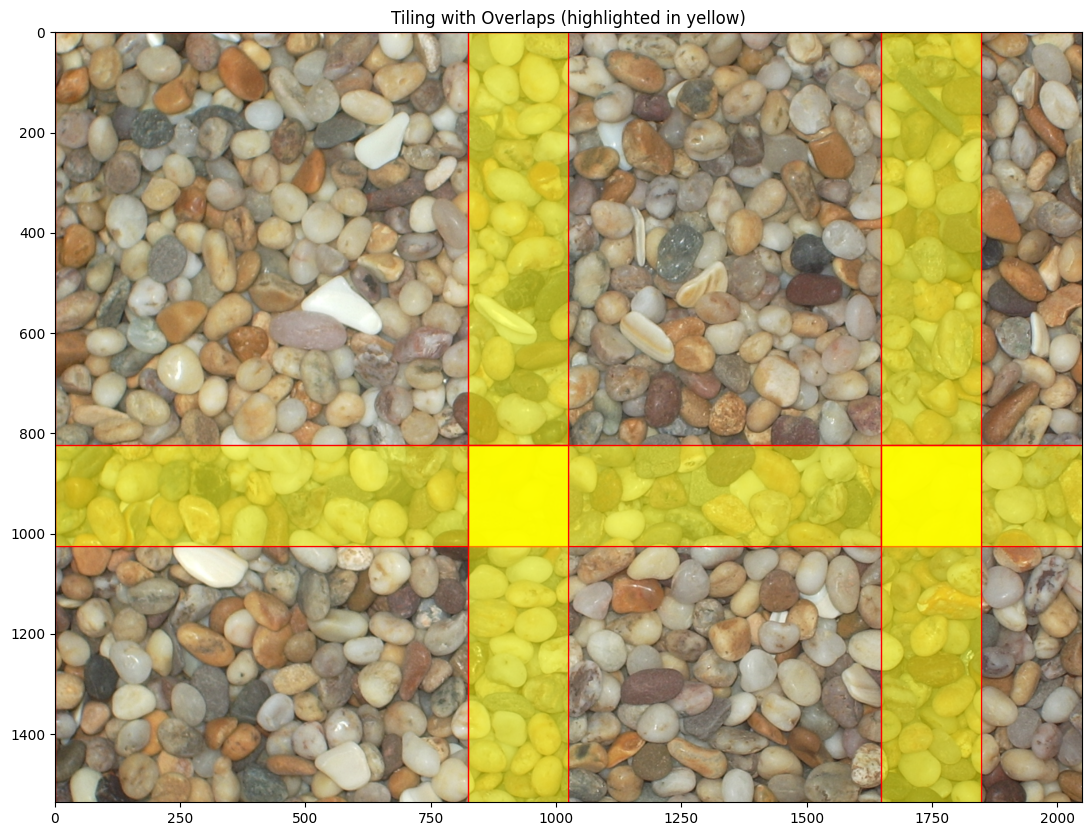

In [12]:
import matplotlib.pyplot as plt
DataDIR = main_para.get('DataDIR')
DSname = main_para.get('DatasetName')
fid = main_para.get('fid')
crop_size = main_para.get('tile_size')
overlap = main_para.get('tile_overlap')
image=load_image(DataDIR,DSname,fid)

plt.figure(figsize=(15,10))
plot_tiling_with_overlap(image, (crop_size,crop_size), overlap)

In [13]:
# Save init_para to a JSON file
para_list.insert(0, {})
pass_para_list = [dict(main_para, **para) for para in para_list]
with open(OutDIR+f'init_para.json', 'w') as json_file:
    json.dump(pass_para_list, json_file, indent=4)
with open(OutDIR+f'pre_para.json', 'w') as json_file:
    json.dump(pre_para_list, json_file, indent=4)

2025-08-11 11:40:39,647 - INFO - ---------------
2025-08-11 11:40:39,648 - INFO - Layer 0
2025-08-11 11:40:39,648 - INFO - 	Segment tiles
2025-08-11 11:40:39,648 - INFO - 	Loaded parameters from json
2025-08-11 11:40:39,648 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org', 'DatasetName': 'SediNet/images', 'fid': 0, 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 1, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 500, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025-08-11 11:40:39,649 - INFO - 	Minimum expected size: 500.0 pixel
2025-08-11 11:40:39,649 - INFO - 	No pre_para found. Only applying resampling.
2025-08-11 11:40:39,

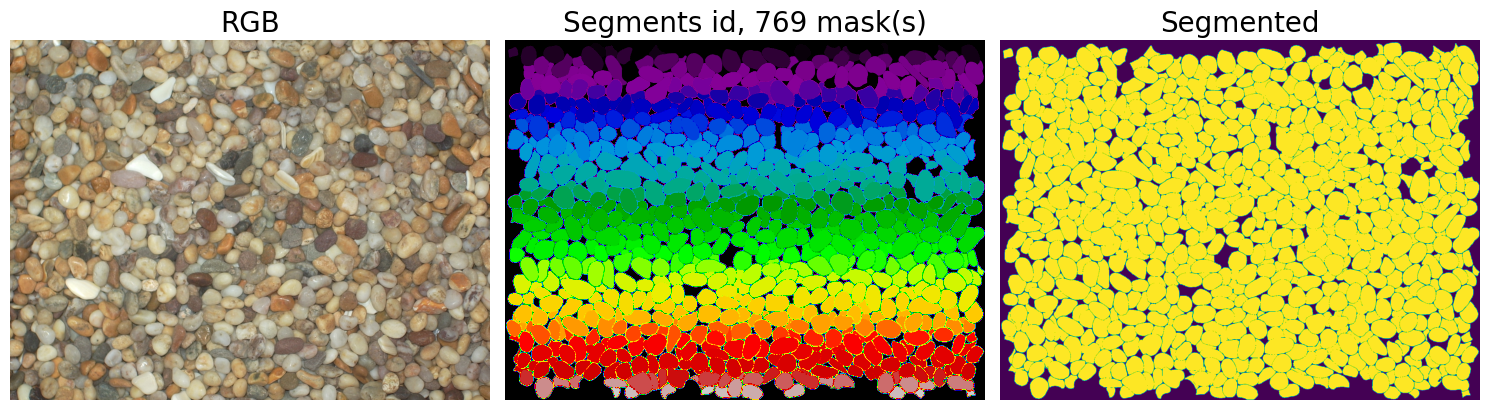

2025-08-11 11:43:21,587 - INFO - 	script took: 3.66 seconds
2025-08-11 11:43:21,588 - INFO - 	Merging completed.
2025-08-11 11:43:21,588 - INFO - ---------------
2025-08-11 11:43:21,589 - INFO - ---------------
2025-08-11 11:43:21,589 - INFO - Layer 1
2025-08-11 11:43:21,590 - INFO - 	Loaded parameters from /home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org
2025-08-11 11:43:21,590 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org', 'DatasetName': 'SediNet/images', 'fid': 0, 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.5, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 500, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025

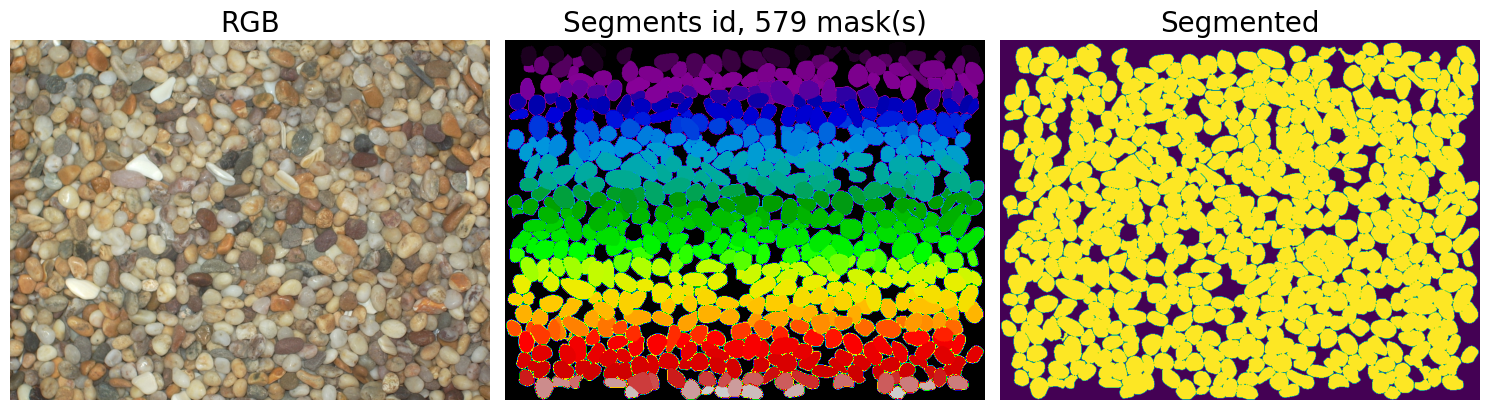

2025-08-11 11:43:59,138 - INFO - 	script took: 1.24 seconds
2025-08-11 11:43:59,139 - INFO - 	Merging completed.
2025-08-11 11:43:59,140 - INFO - ---------------
2025-08-11 11:43:59,178 - INFO - 
2025-08-11 11:43:59,179 - INFO -   0%|          | 0/580 [00:00<?, ?id/s]
2025-08-11 11:43:59,180 - INFO - 
2025-08-11 11:43:59,181 - INFO - 100%|##########| 580/580 [00:00<00:00, 395689.06id/s]
2025-08-11 11:43:59,194 - INFO - 	Layer 001 discovered 12 new mask(s)
2025-08-11 11:43:59,344 - ERROR - 
2025-08-11 11:43:59,345 - ERROR -   0%|          | 0/781 [00:00<?, ?it/s]
2025-08-11 11:43:59,447 - ERROR - 
2025-08-11 11:43:59,447 - ERROR -   7%|7         | 56/781 [00:00<00:01, 551.96it/s]
2025-08-11 11:43:59,553 - ERROR - 
2025-08-11 11:43:59,554 - ERROR -  14%|#4        | 112/781 [00:00<00:01, 536.58it/s]
2025-08-11 11:43:59,654 - ERROR - 
2025-08-11 11:43:59,655 - ERROR -  21%|##1       | 167/781 [00:00<00:01, 539.47it/s]
2025-08-11 11:43:59,755 - ERROR - 
2025-08-11 11:43:59,756 - ERROR -  28

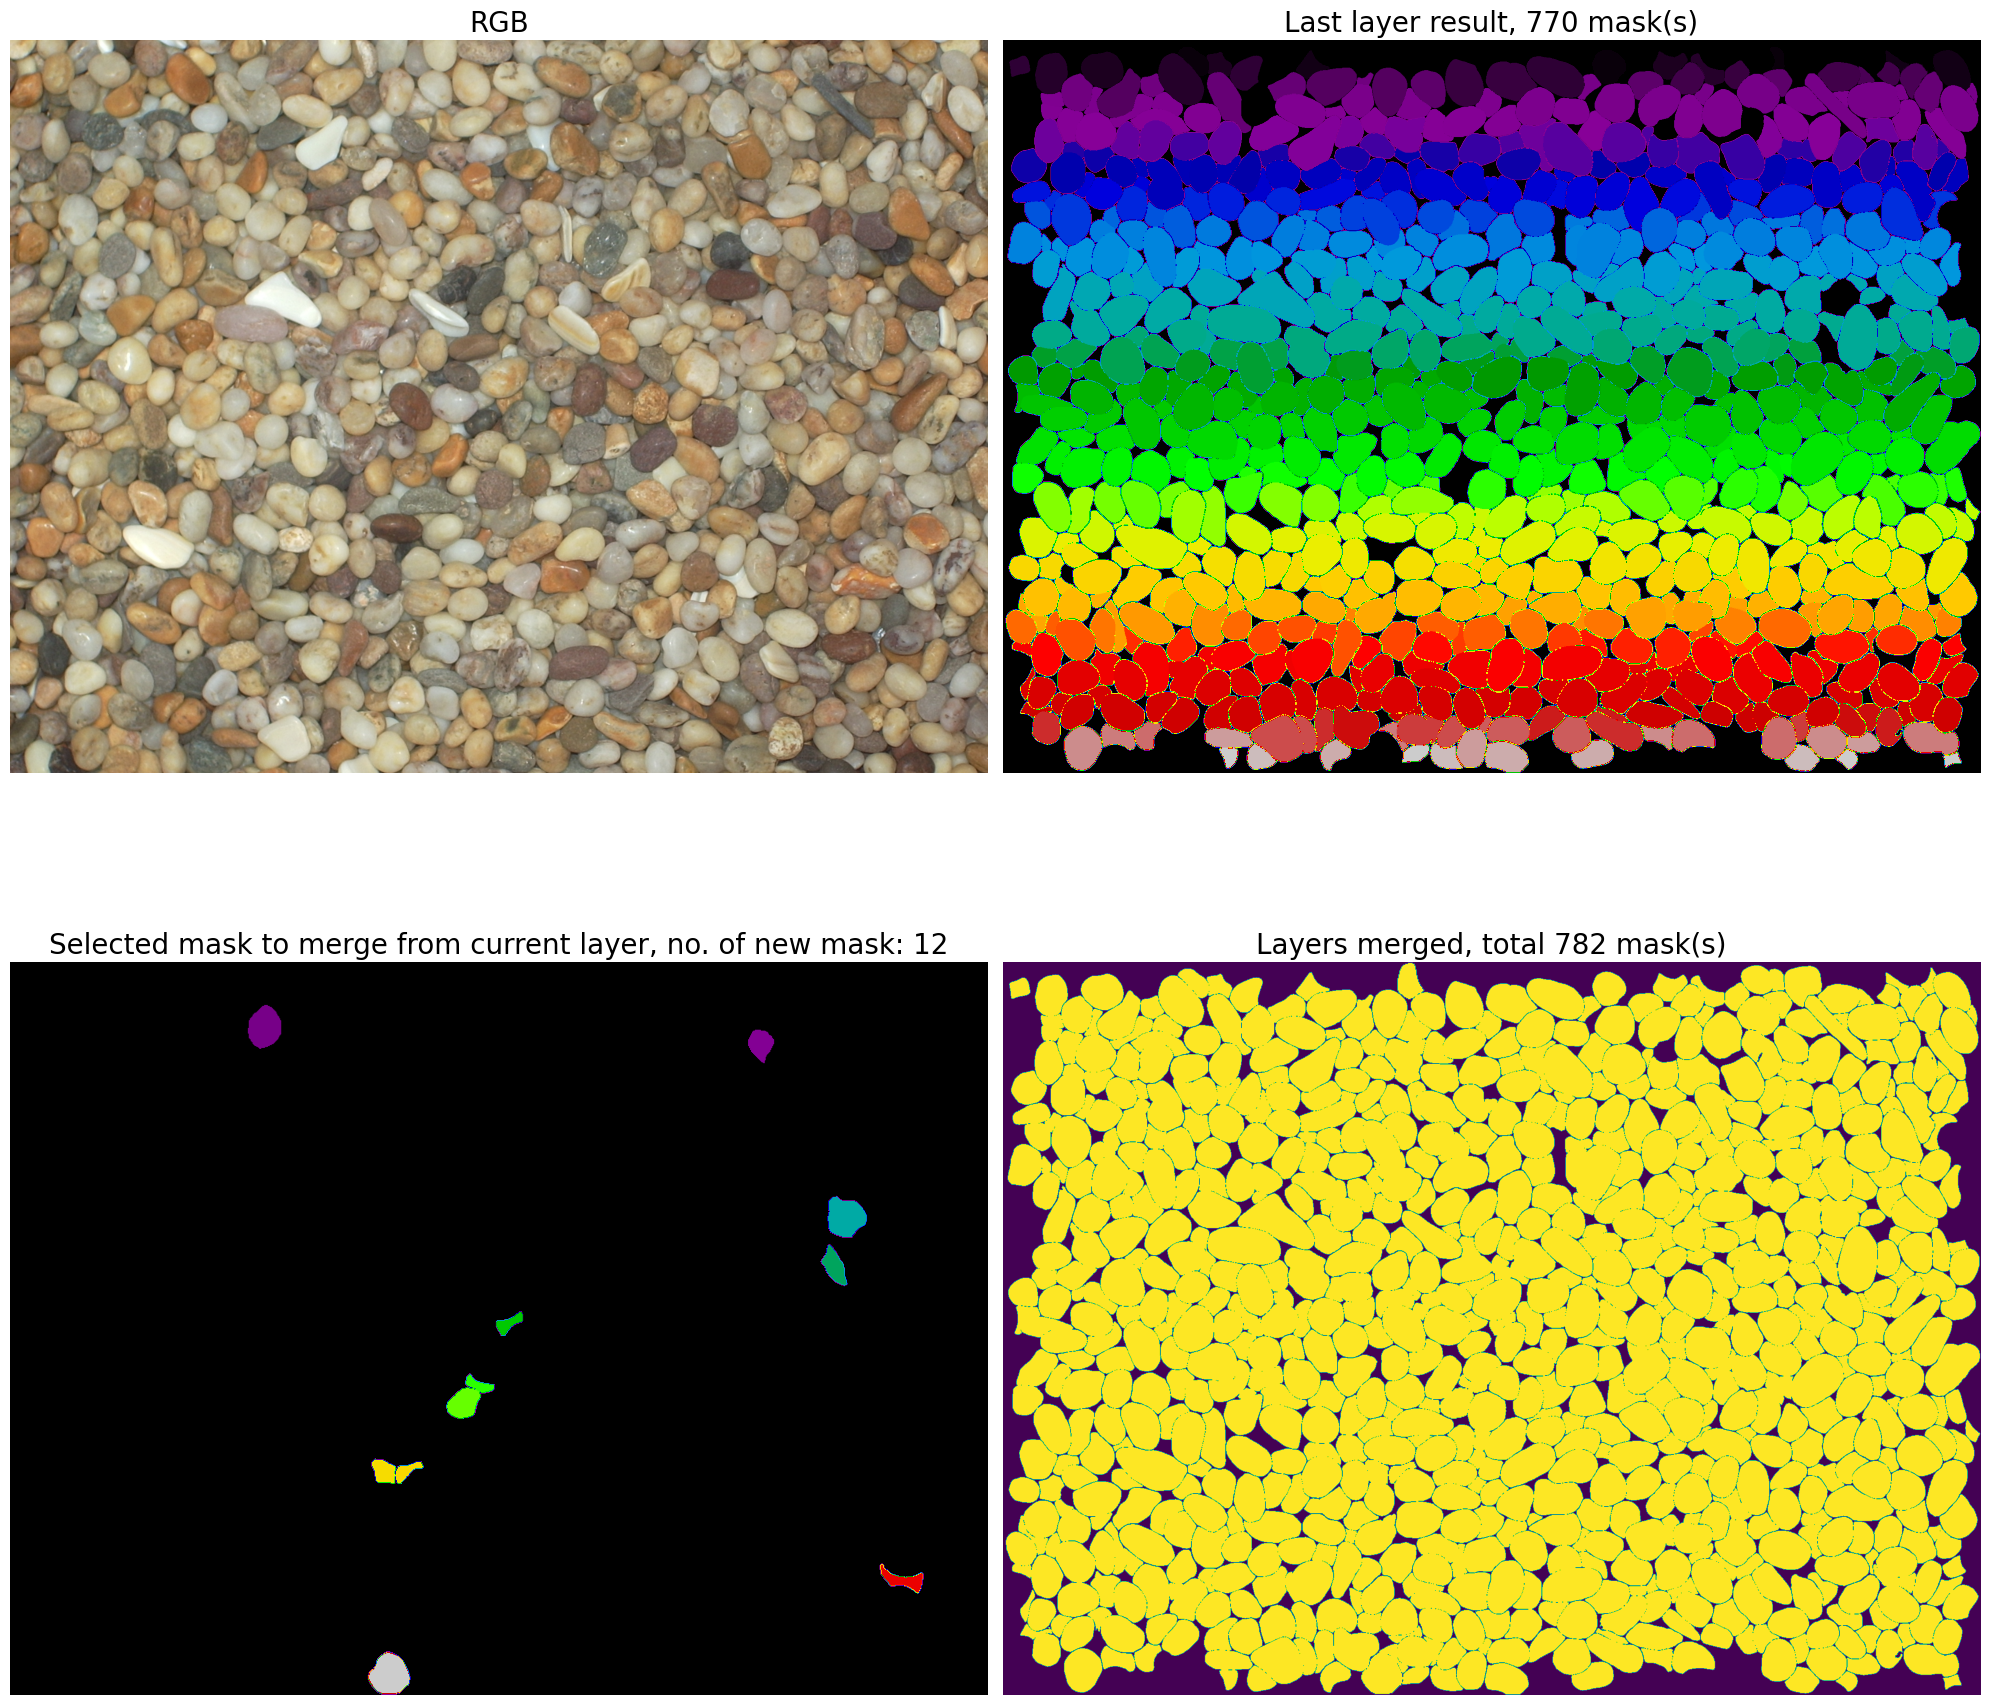

2025-08-11 11:44:03,295 - INFO - 	Saving id mask to /home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org/Merged/Merged_Layers_001.npy...
2025-08-11 11:44:03,304 - INFO - 	Saved
2025-08-11 11:44:03,305 - INFO - 	script took: 41.72 seconds
2025-08-11 11:44:03,305 - INFO - 	Output saved to /home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org
2025-08-11 11:44:03,306 - INFO - ---------------
2025-08-11 11:44:03,307 - INFO - Run took: 3.39 minutes
2025-08-11 11:44:03,307 - INFO - Calculating statistics...
2025-08-11 11:44:03,342 - INFO - /home/bodo/OrthoSAM/data/SediNet/images/4.JPG imported
2025-08-11 11:44:03,350 - INFO - /home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org/Merged/Merged_Layers_001.npy imported
2025-08-11 11:44:03,964 - INFO - Statistics saved to props.csv


KeyboardInterrupt: 

In [14]:
from OrthoSAM import orthosam
orthosam(pass_para_list)

# Verify results and plot

In [57]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merged_results = pd.read_csv('/home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org/props.csv')

In [58]:
merged_results.head()

label  centroid-0   centroid-1  axis_major_length  axis_minor_length  \
0      1   43.145161   849.602384          76.736606          49.258552   
1      2   38.905141  1580.186353          72.643718          57.322914   
2      3   47.056932  1673.821012          84.834066          76.012235   
3      4   45.907216  1939.910653          56.674589          24.638795   
4      5   43.969869   402.195633          80.047475          37.739052   

     area   perimeter        IR         h       IRt       IRn      mean_R  \
0  2852.0  238.497475  0.630074  0.047562  0.930119  0.677412  153.332048   
1  3268.0  214.308658  0.894154  0.013896  0.979282  0.913072  178.107711   
2  4883.0  280.793939  0.778254  0.003008  0.995494  0.781776  151.746467   
3   873.0  149.195959  0.492845  0.155220  0.782254  0.630031  120.177549   
4  2290.0  198.107648  0.733234  0.129022  0.816971  0.897503  195.539738   

       mean_G      mean_B  median_R  median_G  median_B  
0  146.522791  130.555400     154.0     146.0     132.0  
1  168.494186  142.236230     182.0     172.0     144.5  
2  141.858284  122.244317     154.0     144.0     123.0  
3  115.309278  100.788087     119.0     116.0     102.0  
4  169.620524  116.924017     203.0     175.0     116.0

In [72]:
len(merged_results)

778

In [73]:
merged_results.describe()

/home/bodo/miniconda3/envs/OrthoSAM/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/bodo/miniconda3/envs/OrthoSAM/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


label   centroid-0   centroid-1  axis_major_length  \
count  778.000000   778.000000   778.000000         778.000000   
mean   389.500000   767.631961  1041.909469          81.003320   
std    224.733546   425.331782   580.113935          23.731971   
min      1.000000    38.905141    34.464034           2.000000   
25%    195.250000   388.885298   547.556543          68.246225   
50%    389.500000   762.184955  1040.707182          81.353754   
75%    583.750000  1142.118363  1551.524507          92.808784   
max    778.000000  1507.400270  2030.591876         196.380141   

       axis_minor_length         area   perimeter          IR           h  \
count         778.000000   778.000000  778.000000  778.000000  778.000000   
mean           52.722978  3396.438303  230.985924         inf    0.064522   
std            17.100317  1815.228884   61.390189         NaN    0.084732   
min             0.000000     2.000000    0.000000    0.221745    0.000018   
25%            39.872615  1933.500000  196.085047    0.661082    0.014273   
50%            55.423872  3331.000000  236.672619    0.757896    0.037780   
75%            65.489115  4714.250000  270.900541    0.839766    0.086563   
max            90.771035  9886.000000  445.286363         inf    1.000000   

              IRt         IRn      mean_R      mean_G      mean_B    median_R  \
count  778.000000  778.000000  778.000000  778.000000  778.000000  778.000000   
mean     0.909896         inf  155.990964  140.970169  114.690996  158.338689   
std      0.104575         NaN   26.258118   27.059593   26.149475   27.732323   
min      0.000000    0.369697   55.000000   52.500000   41.500000   55.000000   
25%      0.874945    0.739833  139.238545  121.445788   95.591821  140.000000   
50%      0.944256    0.819138  159.201941  141.131184  113.591924  162.000000   
75%      0.978723    0.885665  175.601588  161.007999  131.766270  179.000000   
max      0.999972         inf  234.244808  238.658338  227.833539  239.000000   

         median_G    median_B  
count  778.000000  778.000000  
mean   142.697301  115.645244  
std     28.589345   27.416472  
min     52.500000   41.500000  
25%    122.000000   95.000000  
50%    143.000000  114.000000  
75%    164.000000  133.000000  
max    244.000000  233.000000

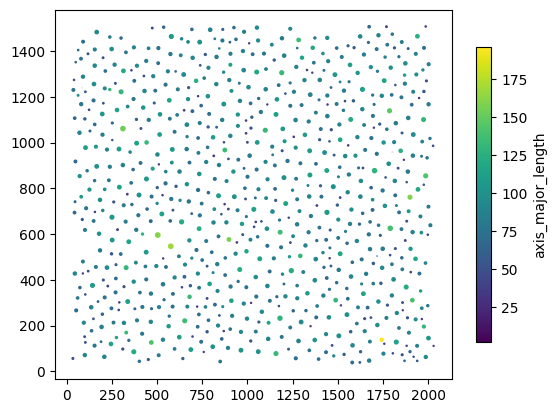

In [66]:
plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Loading labeled images

In [84]:
merged_img = np.load('/home/bodo/OrthoSAM/output/Sedinet/sedinet_0_up2_org/Merged/Merged_Layers_001.npy')

In [85]:
merged_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1536, 2048))

In [86]:
#convert to float
merged_img = merged_img.astype(np.float32)

In [87]:
merged_img[merged_img == 0.0] = np.nan

In [88]:
len(np.unique(merged_img))

782

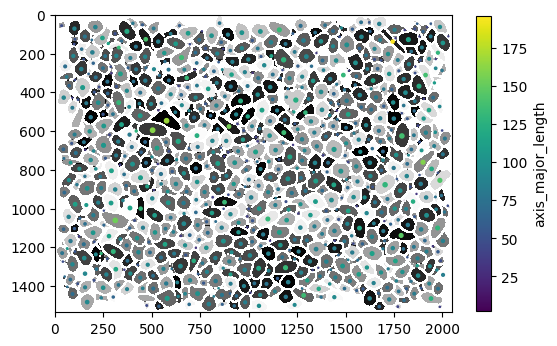

In [89]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')